<a href="https://colab.research.google.com/github/MKhromina/-furry-train/blob/master/%D0%A5%D1%80%D0%BE%D0%BC%D0%B8%D0%BD%D0%B0%D0%9C_%D0%90_%D1%86%D0%B8%D1%84%D1%80%D0%BE%D0%B2%D0%BE%D0%B5_%D1%80%D0%B5%D1%88%D0%B5%D0%BD%D0%B8%D0%B5_random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#импорт необходимых библиотек
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data=files.upload() #загрузка данных (используется только для Google Colab)

Saving data.csv to data.csv


In [4]:
all_data = pd.read_csv('data.csv',)#считываем данные через pandas
all_data#педпросмотр данных (заметно, что в данных есть сортировка по классам (ведние относятся к классу 1, нижние к классу 3) это может негатиыно сказаться на обучении модели)

,temperature,velocity,pressure,incline,class
0,5.1,3.5,1.4,0.2,Class_1
1,4.9,3.0,1.4,0.2,Class_1
2,4.7,3.2,1.3,0.2,Class_1
3,4.6,3.1,1.5,0.2,Class_1
4,5.0,3.6,1.4,0.2,Class_1
...,...,...,...,...,...
129,6.7,3.0,5.2,2.3,Class_3
130,6.3,2.5,5.0,1.9,Class_3
131,6.5,3.0,5.2,2.0,Class_3
132,6.2,3.4,5.4,2.3,Class_3


In [0]:
newdata=all_data.sample(frac=1) #перемешиваем данные
x = newdata.iloc[:,0:-1] #выбор признаков
y = newdata.iloc[:,[-1]]#выбор значений
#предобработка значений в вид, допустимый для обучения
y1=(y['class']  == 'Class_1')
y2=(y['class']  == 'Class_2')
y3=(y['class']  == 'Class_3')
y_train1=pd.DataFrame({'class1':y1, 'class2':y2, 'class3':y3})
y_train1.astype(int)
#предобработка признаков в вид, пригодный для обучения
x1=x.temperature.mean()
x2=x.velocity.mean()
x3=x.pressure.mean()
x4=x.incline.mean()
xs1=x.temperature.std()
xs2=x.velocity.std()
xs3=x.pressure.std()
xs4=x.incline.std()
x.temperature-=x1
x.temperature/=xs1
x.velocity-=x2
x.velocity/xs2
x.pressure-=x3
x.pressure/=xs3
x.incline-=x4
x.incline/=xs4
#выбор тестовых и тренировочных данных
x_train=x.iloc[0:103,0:]
x_test=x.iloc[103:134,0:]
y_train=(y_train1.iloc[0:103]).astype(int)
y_test=(y_train1.iloc[103:134]).astype(int)
y_test2=tf.stack(y_test)
y_train2=tf.stack(y_train)
x_train2=tf.stack(x_train)
x_test2=tf.stack(x_test)

In [0]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from pandas import read_csv as read
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold

In [0]:
XRF=np.array(x)
YRF=np.array(y)

In [55]:
from sklearn.model_selection import train_test_split as train
X_trainRF, X_testRF, y_trainRF, y_testRF = train(XRF, YRF, test_size=0.3)

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=16,random_state = 42, n_jobs=-1) #n_estimators — число деревьев в "лесу",
#criterion — оскольку у нас теперь задача классификации, то по дефолту выбран критерий "gini" (можно выбрать "entropy"),
#n_jobs — количество ядер для построения модели и предсказаний (по дефолту 1, если поставить -1, то будут использоваться все ядра)
#random_state — начальное значение для генерации случайных чисел (по дефолту его нет, но чтобы были воспроизводимые результаты, 
#то нужно указать любое число типа in
clf.fit(X_trainRF, y_trainRF)
print("Точность работы на тестовых данных: %.2f%%" % (clf.score(X_testRF, y_testRF)*100))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


Точность работы на тестовых данных: 97.56%


In [0]:
from sklearn.model_selection import cross_val_score

посмотрим как ведетут себя кривые валидации при изменении основных параметров. Начнем с количества деревьев

In [32]:
# Инициализируем валидацию
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Создаем списки для сохранения точности на тренировочном и тестовом датасете
train_acc = []
test_acc = []
temp_train_acc = []
temp_test_acc = []
trees_grid = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80,85, 90, 95, 100]

# Обучаем на тренировочном датасете
for ntrees in trees_grid:
    rfc = RandomForestClassifier(n_estimators=ntrees, random_state=42, n_jobs=-1, oob_score=True)
    temp_train_acc = []
    temp_test_acc = []
    for train_index, test_index in skf.split(XRF, YRF):
        X_trainRF, X_testRF = x.iloc[train_index], x.iloc[test_index]
        y_trainRF, y_testRF = YRF[train_index],YRF[test_index]
        rfc.fit(X_trainRF, y_trainRF)
        temp_train_acc.append(rfc.score(X_trainRF, y_trainRF))
        temp_test_acc.append(rfc.score(X_testRF, y_testRF))
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)

train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
print("Best accuracy on CV is {:.2f}% with {} trees".format(max(test_acc.mean(axis=1))*100, 
                                                        trees_grid[np.argmax(test_acc.mean(axis=1))]))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably m

Best accuracy on CV is 97.04% with 15 trees


Text(0.5, 0, 'N_estimators')

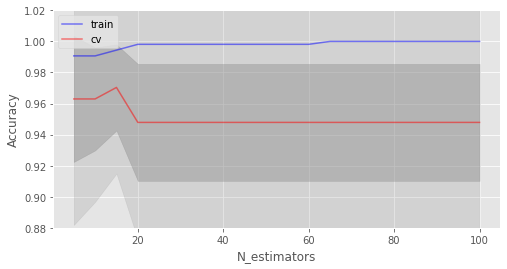

In [33]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(trees_grid, train_acc.mean(axis=1), alpha=0.5, color='blue', label='train')
ax.plot(trees_grid, test_acc.mean(axis=1), alpha=0.5, color='red', label='cv')
ax.fill_between(trees_grid, test_acc.mean(axis=1) - test_acc.std(axis=1), test_acc.mean(axis=1) + test_acc.std(axis=1), color='#888888', alpha=0.4)
ax.fill_between(trees_grid, test_acc.mean(axis=1) - 2*test_acc.std(axis=1), test_acc.mean(axis=1) + 2*test_acc.std(axis=1), color='#888888', alpha=0.2)
ax.legend(loc='best')
ax.set_ylim([0.88,1.02])
ax.set_ylabel("Accuracy")
ax.set_xlabel("N_estimators")